In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [5]:
N = 1000
Tp = 800
t = np.arange(0, N)
x = np.sin(0.02 * t) + 2 * np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.652317
1,1.424925
2,1.002418
3,0.262050
4,1.619492


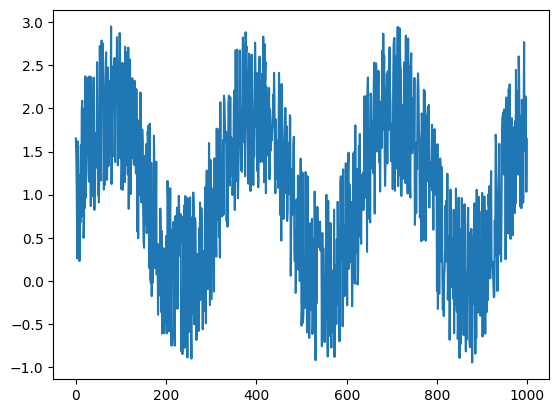

In [6]:
plt.plot(df)
plt.show()

In [7]:
values = df.values
train, test = values[0 : Tp, :], values[Tp : N, :]

In [8]:
step = 4
test = np.append(test, np.repeat(test[-1,], step))
train = np.append(train, np.repeat(train[-1,], step))

In [17]:
def convertToMatrix(data, step):
    X, y =[], []
    for i in range(len(data) - step):
        d = i + step
        X.append(data[i:d,])
        y.append(data[d,])
        return np.array(X), np.array(y)

In [18]:
trainX, trainy = convertToMatrix(train, step)
testX, testy = convertToMatrix(test, step)

In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(1, 1, 4)

In [20]:
testX.shape

(1, 1, 4)

In [22]:
model = Sequential()
model.add(SimpleRNN(units = 32, input_shape = (1, step), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'rmsprop')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457 (5.69 KB)

 Trainable params: 1,457 (5.69 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(trainX, trainy, epochs = 100, batch_size = 16, verbose = 2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict, testPredict), axis = 0)

Epoch 1/100
1/1 - 4s - 4s/step - loss: 0.8505
Epoch 2/100
1/1 - 0s - 65ms/step - loss: 0.5232
Epoch 3/100
1/1 - 0s - 81ms/step - loss: 0.3549
Epoch 4/100
1/1 - 0s - 72ms/step - loss: 0.2476
Epoch 5/100
1/1 - 0s - 80ms/step - loss: 0.1740
Epoch 6/100
1/1 - 0s - 81ms/step - loss: 0.1220
Epoch 7/100
1/1 - 0s - 73ms/step - loss: 0.0849
Epoch 8/100
1/1 - 0s - 81ms/step - loss: 0.0583
Epoch 9/100
1/1 - 0s - 77ms/step - loss: 0.0393
Epoch 10/100
1/1 - 0s - 74ms/step - loss: 0.0260
Epoch 11/100
1/1 - 0s - 57ms/step - loss: 0.0168
Epoch 12/100
1/1 - 0s - 65ms/step - loss: 0.0106
Epoch 13/100
1/1 - 0s - 73ms/step - loss: 0.0065
Epoch 14/100
1/1 - 0s - 73ms/step - loss: 0.0039
Epoch 15/100
1/1 - 0s - 75ms/step - loss: 0.0022
Epoch 16/100
1/1 - 0s - 84ms/step - loss: 0.0012
Epoch 17/100
1/1 - 0s - 63ms/step - loss: 6.6246e-04
Epoch 18/100
1/1 - 0s - 79ms/step - loss: 3.3956e-04
Epoch 19/100
1/1 - 0s - 74ms/step - loss: 1.6647e-04
Epoch 20/100
1/1 - 0s - 83ms/step - loss: 7.7796e-05
Epoch 21/100
1/

In [24]:
trainScore = model.evaluate(trainX, trainy, verbose = 0)

In [25]:
trainScore

0.0